In [19]:
import pandas as pd
import re
import matplotlib.pyplot as plt

def carregar_dados(arquivo):
    with open(arquivo, 'r', encoding='utf-8') as f:
        conteudo = f.readlines()
    
    # inicializacao de listas
    datas, horas, remetentes, mensagens = [], [], [], []
    
    # Expressão para identificar data, hora, remetente e mensagem
    padrao = r"^\[(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2}:\d{2}\s[APM]{2})\] (.*?): (.+)"
    
    for linha in conteudo:
        match = re.match(padrao, linha)
        if match:
            data, hora, remetente, mensagem = match.groups()
            # Verifica se a linha e uma mensagem e nao texto de sistema
            if "‎" not in remetente and "‎" not in mensagem:
                datas.append(data)
                horas.append(hora)
                remetentes.append(remetente)
                mensagens.append(mensagem)
        else:
            if mensagens:
                mensagens[-1] += " " + linha.strip()
                
    df = pd.DataFrame({
        'data': datas,
        'hora': horas,
        'remetente': remetentes,
        'mensagem': mensagens
    })
    return df

arquivo = 'chat.txt'
df = carregar_dados(arquivo)
print(df.head())

       data        hora remetente                   mensagem
0  25/01/23  3:20:50 PM    Cassio                          é
1  25/01/23  3:20:54 PM    Cassio       e o nicolau roles !!
2  25/01/23  3:20:56 PM    Cassio                       foda
3  25/01/23  3:21:00 PM    Cassio  bom cálcio vai jogar aqui
4  25/01/23  3:21:02 PM    Cassio                     👍🏻👍🏻👍🏻


In [25]:
def resumo_conversas(df):
    resumo = df['remetente'].value_counts().reset_index()
    resumo.columns = ['remetente', 'quantidade']
    resumo = resumo.sort_values(by='quantidade', ascending=False)
    return resumo

resumo = resumo_conversas(df)
print("Resumo das conversas:")
print(resumo)

Resumo das conversas:
      remetente  quantidade
0        Cassio       23121
1  A nicolau BI       19251


In [24]:
def historico_remetente(df, remetente):
    filtro = df[df['remetente'] == remetente][['data', 'hora', 'mensagem']]
    return filtro

remetente = input("Digite o nome do remetente para filtrar o histórico: ")
historico = historico_remetente(df, remetente)

if not historico.empty:
    print(f"Mensagens de {remetente}:")
    print(historico)
else:
    print(f"Nenhuma mensagem encontrada para o remetente {remetente}.")


Mensagens de Cassio:
            data        hora                   mensagem
0     2023-01-25  3:20:50 PM                          é
1     2023-01-25  3:20:54 PM       e o nicolau roles !!
2     2023-01-25  3:20:56 PM                       foda
3     2023-01-25  3:21:00 PM  bom cálcio vai jogar aqui
4     2023-01-25  3:21:02 PM                     👍🏻👍🏻👍🏻
...          ...         ...                        ...
42367 2024-10-25  5:59:00 AM             não é possível
42368 2024-10-25  5:59:03 AM           e eu caguei duro
42369 2024-10-25  5:59:04 AM                     normal
42370 2024-10-25  5:59:07 AM        aquela hora na call
42371 2024-10-25  5:59:15 AM             q porra q está

[23121 rows x 3 columns]


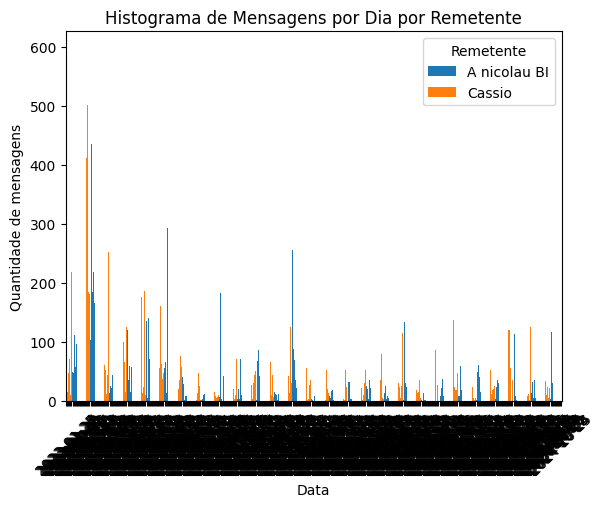

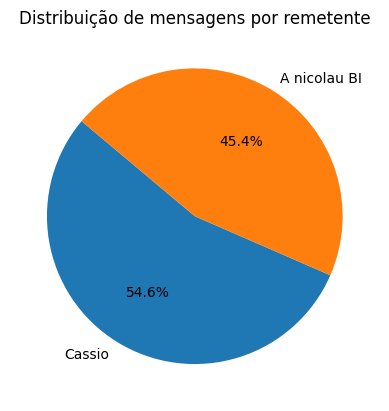

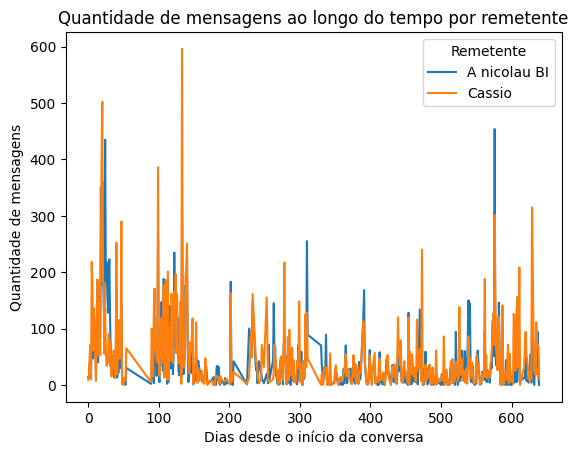

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def grafico_histograma(df):
    # Converter a coluna de data para datetime, especificando o formato
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%y', dayfirst=True)
    
    # Agrupar por data e remetente
    mensagens_por_dia = df.groupby([df['data'].dt.date, 'remetente']).size().unstack(fill_value=0)

    mensagens_por_dia.plot(kind='bar', stacked=False, title='Histograma de Mensagens por Dia por Remetente')
    plt.xlabel('Data')
    plt.ylabel('Quantidade de mensagens')
    plt.xticks(rotation=45)
    plt.legend(title='Remetente')
    plt.show()

def grafico_pizza(df):
    resumo = df['remetente'].value_counts()
    plt.pie(resumo, labels=resumo.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribuição de mensagens por remetente')
    plt.show()

def grafico_linhas(df):
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%y', dayfirst=True)
    df_grouped = df.groupby(['data', 'remetente']).size().unstack(fill_value=0)
    
    df_grouped.index = (df_grouped.index - df_grouped.index.min()).days

    df_grouped.plot(kind='line', title='Quantidade de mensagens ao longo do tempo por remetente')
    plt.xlabel('Dias desde o início da conversa')
    plt.ylabel('Quantidade de mensagens')
    plt.legend(title='Remetente')
    plt.show()

grafico_histograma(df)
grafico_pizza(df)
grafico_linhas(df)